# Morphological causatives in Lev 17-26

In the Hebrew Bible we encounter two types of causatives: 1) The morphological causative (primarily the *Hiphil* stem variation of the *Qal*), and 2) lexical causatives which cannot be derived from a non-causative correspondent. In this notebook we will explore the first of these types.

In [1]:
#Dataset path
PATH = 'datasets/'

import pandas as pd
import collections

#Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#Text-fabric
from tf.app import use

In [2]:
A = use('bhsa', hoist=globals())

TF app is up-to-date.
Using annotation/app-bhsa commit 5fdf1778d51d938bfe80b37b415e36618e50190c (=latest)
  in C:\Users\Ejer/text-fabric-data/__apps__/bhsa.
Using etcbc/bhsa/tf - c r1.4 in C:\Users\Ejer/text-fabric-data
Using etcbc/phono/tf - c r1.1 in C:\Users\Ejer/text-fabric-data
Using etcbc/parallels/tf - c r1.1 in C:\Users\Ejer/text-fabric-data


In [3]:
def reverse_hb(array):
    return [l[::-1] for l in array]

def getLex(string, trans=True):
    
    if trans:
        string = string[:string.index('_')]
    else:
        string = string[string.index('_')+1:]
    return string

## Morphological causatives (*Hiphil* and *Qal*)

First, we identify all those verbs occuring in either *Hiphil* or *Piel* (or their passive equivalents) in Lev 17-26:

In [4]:
hif_piel = '''
book book=Leviticus
 chapter chapter=17|18|19|20|21|22|23|24|25|26
   clause
     phrase function=Pred|PreS|PreO|PreC|PtcO
      word pdp=verb vs=piel|pual|hif|hof
'''
hif_piel = A.search(hif_piel)

  2.63s 277 results


In [5]:
hif_piel = set([F.lex.v(r[4]) for r in hif_piel])
len(hif_piel)

76

We will only look at those with a possible *Qal* derivable. Therefore, we search the corpus (Genesis - Kings) possible for *Qal* correlates:

In [6]:
# prepare the corpus

corpus = [book for book in F.otype.s('book') if book < T.nodeFromSection(('Isaiah',))]
sets={'corpus':corpus} # make set for searching

In [7]:
equiv = '''
corpus
  clause
    phrase function=Pred|PreS|PreO|PreC|PtcO
      word pdp=verb vs=qal lex={}
'''
equiv = A.search(equiv.format('|'.join(list(hif_piel))), sets=sets)

  2.48s 5692 results


In [8]:
unique_verbs = set([F.lex.v(r[3]) for r in equiv])
len(unique_verbs)

45

We will look at the *Hiphil* and *Piel* cases in turn. Therefore we use the list just generated to extract the lexemes and stems from the Leviticus-corpus:

In [9]:
hif_piel_Lev = '''
book book=Leviticus
 chapter chapter=17|18|19|20|21|22|23|24|25|26
   clause
     phrase function=Pred|PreS|PreO|PreC|PtcO
      word pdp=verb vs=piel|pual|hif|hof lex={}
'''
hif_piel_Lev = A.search(hif_piel_Lev.format('|'.join(list(unique_verbs))))

  1.65s 207 results


In [10]:
hiphil = set()
piel = set()

for r in hif_piel_Lev:
    lex = F.lex.v(r[4])
    stem = F.vs.v(r[4])
    
    if stem in {'hif','hof'}:
        hiphil.add(lex)
    elif stem in {'piel','pual'}:
        piel.add(lex)

In [11]:
print(f'There are {len(hiphil)} Hiphil and {len(piel)} Piel to explore')

There are 32 Hiphil and 15 Piel to explore


### *Hiphil*

One way to check if the *Hiphil* is used as a morphological causative is to check whether its transitivity increases, because an increase would often imply an extra agent, possibly a causer. We can check this by collecting all instances of the lexeme in qal and hiphil and compute the transitivity frame for each instance.

We explore the patterns within our corpus (Genesis - Kings):

We define a set of transitivity or valency patterns to filter the lexeme instances:

In [12]:
# Monovalent or avalent frame without object and complement. Subject may be implicit or explicit.
avalent_monovalent = '''
corpus
 clause
 /without/
    phrase function=Objc|Cmpl
 /-/
   phrase function=Pred|PreS
     word lex={} vs={}
'''

#Divalent frame with complement and no object
divalent1 = '''
corpus
 clause
 /without/
   phrase function=Objc
 /-/
   phrase function=Pred|PreS
     word lex={} vs={}
   phrase function=Cmpl 
'''

#Divalent frame with object suffix and no lexical object and complement.
divalent2 = '''
corpus
 clause
 /without/
   phrase function=Objc|Cmpl
 /-/
   phrase function=PreO
     word lex={} vs={}
'''

#Divalent frame with lexical object and no complement
divalent3 = '''
corpus
 clause
 /without/
   phrase function=Cmpl
 /-/
 /without/
   phrase function=Objc
   > phrase function=Objc
 /-/ 
   phrase function=Pred|PreS
     word lex={} vs={}
   phrase function=Objc
'''

#Trivalent frame with one lexical object and complement
trivalent1 = '''
corpus
 clause
 /without/
   phrase function=Objc
   > phrase function=Objc
 /-/
   phrase function=Pred|PreS
     word lex={} vs={}
   phrase function=Cmpl
   phrase function=Objc
'''

#Trivalent frame with one object suffix and lexical complement
trivalent2 = '''
corpus
 clause
 /without/
   phrase function=Objc
 /-/
 /without/
   phrase function=Objc
   > phrase function=Objc
 /-/
   phrase function=PreO
     word lex={} vs={}
   phrase function=Cmpl
'''

#Trivalent frame with double object, both lexical
trivalent3 = '''
corpus
 clause
 /without/
    phrase function=Cmpl
 /-/
    phrase function=Pred|PreS
      word lex={} vs={}
    phrase function=Objc
    > phrase function=Objc
'''

#Trivalent frame with double object, one being suffix
trivalent4 = '''
corpus
 clause
 /without/
    phrase function=Cmpl
 /-/
    phrase function=PreO
      word lex={} vs={}
    phrase function=Objc
'''

#Tetravalent frame with double object and complement
tetravalent1 = '''
corpus
 clause
    phrase function=Pred|PreS
      word lex={} vs={}
    phrase function=Objc
    > phrase function=Objc
    phrase function=Cmpl
'''

#Tetravalent frame with double object, one being suffix, and complement
tetravalent2 = '''
corpus
 clause
    phrase function=PreO
      word lex={} vs={}
    phrase function=Objc
    phrase function=Cmpl
'''

In [13]:
frames = {'(S)':avalent_monovalent, '(S)-C':divalent1, '(S)-O_sfx':divalent2, '(S)-O':divalent3, '(S)-O-C':trivalent1,
          '(S)-O_sfx-C':trivalent2, '(S)-O-O':trivalent3, '(S)-O-O_sfx':trivalent4, '(S)-O-O-C':tetravalent1,
         '(S)-O-O_sfx-C':tetravalent2}

stems = 'qal|hif'

lexemes = '|'.join(hiphil)


verb_constructions = {}

n=0
for fr in frames:
    
    clause = ''
    lex = ''
    stem = ''
    
    results = A.search(frames[fr].format(lexemes, stems), sets=sets, silent=True)
    
    for r in results:
        
        clause = r[1]
        lex = F.lex.v(r[3])
        gloss = F.gloss.v(L.u(r[3], 'lex')[0])
        verb = f'{lex}_{gloss}'
        stem = F.vs.v(r[3])
        
        verb_constructions[clause] = [verb, stem, fr]
            
    n+=1
    print(f'... frame {n} completed')

... frame 1 completed
... frame 2 completed
... frame 3 completed
... frame 4 completed
... frame 5 completed
... frame 6 completed
... frame 7 completed
... frame 8 completed
... frame 9 completed
... frame 10 completed


#### Creating dataframe

In [14]:
hif_df = pd.DataFrame(verb_constructions).T
hif_df.columns = ['lex','stem','frame']
hif_df.head()

lex stem frame
427632  PRH[_be fertile  qal   (S)
427633     RBH[_be many  qal   (S)
427635     RBH[_be many  qal   (S)
427657  PRH[_be fertile  qal   (S)
427658     RBH[_be many  qal   (S)

#### Evaluating data extraction

In [15]:
all_cases = '''
corpus
 clause
  phrase function=Pred|PreO|PreS
   word lex={} sp=verb vs=qal|hif
'''

results_all_cases = A.search(all_cases.format(lexemes), sets=sets)

  1.65s 6480 results


In [16]:
all_clauses = [r[1] for r in results_all_cases]

error_list = []

for cl in all_clauses:
    if cl not in hif_df.index:
        error_list.append(cl)
        
print(f'Number of missing cases: {len(error_list)}')

Number of missing cases: 0


#### Simplifying the dataset

We combine some of the frames in order not to distinguish between lexical and suffix object. That will probably give a clearer picture of the general tendency. First we cross-tabulate lex, stem and frame:

In [17]:
df_frequency = pd.crosstab(index=[hif_df.lex, hif_df.stem], columns=hif_df.frame)

#Column total:
df_frequency['total'] = df_frequency.sum(axis=1)
df_frequency.head()

frame             (S)  (S)-C  (S)-O  (S)-O-C  (S)-O-O  (S)-O-O-C  (S)-O-O_sfx  \
lex         stem                                                                
<BR[_pass   hif     1      1      6       20        3          0            2   
            qal    51    111     52        9        0          0            0   
<LH[_ascend hif     4     14     34       47        0          1            1   
            qal   121    231      2        0        0          0            0   
>BD[_perish hif     0      0      4        2        0          0            0   

frame             (S)-O-O_sfx-C  (S)-O_sfx  (S)-O_sfx-C  total  
lex         stem                                                
<BR[_pass   hif               0          1            4     38  
            qal               0          0            0    223  
<LH[_ascend hif               3          1           24    129  
            qal               0          0            0    354  
>BD[_perish hif               0          4            0     10

We now reduce the number of frames by combining them:

In [18]:
update_columns = [('(S)','(S)-C'),
                  ('(S)-O','(S)-O_sfx','(S)-O-C','(S)-O_sfx-C'),
                  ('(S)-O-O','(S)-O-O_sfx','(S)-O-O-C','(S)-O-O_sfx-C')
                 ]

for c in update_columns:
    retain_col = c[0]
    copy_col = c[1:]
    
    for d in copy_col:
        new_col = df_frequency[retain_col] + df_frequency[d]
       
        #Dropping columns:
        df_frequency = df_frequency.drop([retain_col,d], axis=1)
    
        #Add new column:
        df_frequency[retain_col] = new_col

In [19]:
df_frequency = df_frequency[['(S)','(S)-O','(S)-O-O','total']]

In [20]:
df_frequency.head()

frame             (S)  (S)-O  (S)-O-O  total
lex         stem                            
<BR[_pass   hif     2     31        5     38
            qal   162     61        0    223
<LH[_ascend hif    18    106        5    129
            qal   352      2        0    354
>BD[_perish hif     0     10        0     10

#### Plotting tendencies

In [21]:
def genTendency(df, stem1, stem2, title, col_order, colormap='blue', ylim=50):
    
    #Isolating qal
    stem1_df = df.loc[df.index.get_level_values(1) == stem1]
    stem1_prop = stem1_df.sum() / stem1_df.sum().total * 100

    #Isolating hiphil
    stem2_df = df.loc[df.index.get_level_values(1) == stem2]
    stem2_prop = stem2_df.sum() / stem2_df.sum().total * 100
    
    fig, ax = plt.subplots()
    fig.canvas.draw()

    h1 = plt.bar(col_order, stem1_prop.reindex(col_order), color=colormap, alpha=(0.6))
    h2 = plt.bar(col_order, -stem2_prop.reindex(col_order), color=colormap, alpha=(0.3))
    
    #Title
    plt.title(title, pad=15, fontsize=24)

    #Axes
    plt.ylim(-ylim,ylim)
    ytick_labels = [x if x > 0 else -x for x in range(-ylim,ylim+1,10)]
    plt.yticks(range(-ylim,ylim+1,10), ytick_labels, fontsize=16)  
    plt.ylabel('%', fontsize=20, rotation = 0)
    plt.xticks(fontsize=16, rotation=15)
    plt.axhline(0, color='gray')

    #Legend:
    intrans = mpatches.Patch(color='red', alpha=(0.6), label='Intransitive')
    trans = mpatches.Patch(color='blue', alpha=(0.6), label='Transitive')
    ditrans = mpatches.Patch(color='green', alpha=(0.6), label='Ditransitive')
    plt.legend(handles=[intrans, trans, ditrans], fontsize=14, loc='lower center', ncol=3, frameon=False)

    #Text
    plt.text(0, stem1_prop.reindex(col_order)[0]+4, stem1, size=14,
             ha="center", va="center")

    plt.text(0, -stem2_prop.reindex(col_order)[0]-4, stem2, size=14,
             ha="center", va="center")

    plt.rcParams["figure.figsize"] = (15,7)
    plt.show()

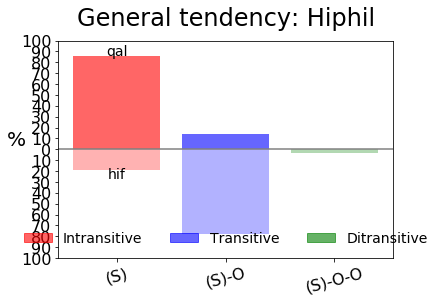

In [22]:
colormap = ['red','blue','green']
col_order = ['(S)','(S)-O','(S)-O-O']

genTendency(df_frequency, 'qal','hif',"General tendency: Hiphil", col_order, colormap, ylim=100)

In short, we see a strong tendency of transitivity increase in the *Hiphil*.

Are there any exceptions to this tendency?

#### Plotting individuals

In [23]:
qal_df = df_frequency.loc[df_frequency.index.get_level_values(1) == 'qal']
qal_prop = qal_df.div(qal_df.total, axis=0)
qal_prop = qal_prop[['(S)','(S)-O','(S)-O-O']].sort_values(by='(S)', ascending=False)

hif_df = df_frequency.loc[df_frequency.index.get_level_values(1) == 'hif']
hif_prop = hif_df.div(hif_df.total, axis=0)
hif_prop = hif_prop[['(S)','(S)-O','(S)-O-O']]

In [24]:
comb_df = pd.concat([qal_prop.unstack(), hif_prop.unstack()], axis=1)

comb_df = comb_df.sort_values(by=[('(S)','qal'), ('(S)-O','hif')], ascending=False)

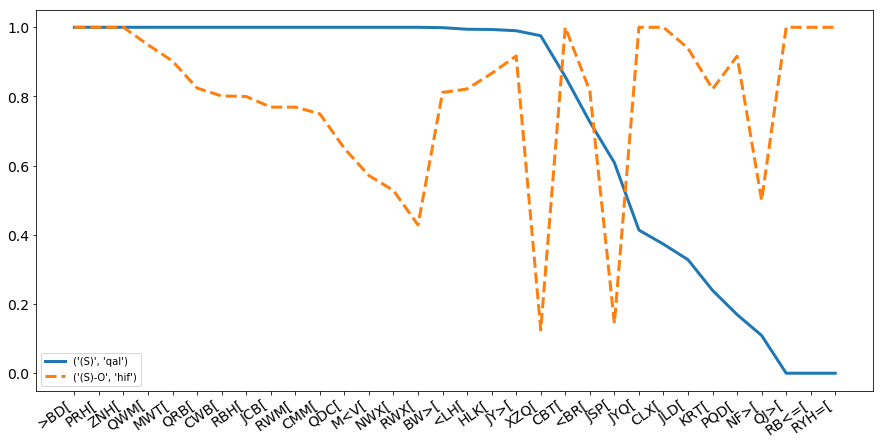

In [25]:
def plotInd(df,
           columns = list(),
           gloss=True
           ):
    
    if gloss:
        xaxis = [v[v.index('_')+1:] for v in list(df.index)]
    else:
        xaxis = [v[:v.index('_')] for v in list(df.index)]
        
    line_type = ['-','--',':','-.']
        
    for c in columns:
        plt.plot(xaxis, comb_df[c], lw=3, ls=line_type[columns.index(c)])
        
    plt.xticks(xaxis, size=14, rotation=35, ha='right')
    plt.yticks(size=14)
    
    plt.legend()
    
    plt.show()

plotInd(comb_df, [('(S)','qal'),('(S)-O','hif')], gloss=False)

#### Plotting increasing transitivity

We want to compute a degree of transitivity increase, so that both intransitive and transitive verbs can be equally accounted for.

We begin by compute a dateframe with the ratio of all alternations between *Qal* and *Hiphil*. The ratio is computed by multiplying each *Qal* column with each *Hiphil* column. The alterantion ratio is hypothezized as the result of the proportion in *Qal* and the proportion in *Hiphil*, that is, Qal x Hiphil. A high proportion of, e.g., *Qal* intransitive and *Hiphil* transitive would result in a high ratio, e.g.:

Qal_intrans (50%) x Hiphil trans (75%) = 37,5%

In [26]:
def alternations(df, stems=('qal','hif')):
    
    #Creating a proportional table of the dataframe (column-wise)
    prop_table = df.div(df.total, axis=0)
    
    prop_table = prop_table.drop('total', axis=1) #The total-column is dropped
    prop_table.columns = [col + '_' for col in prop_table.columns] #Adding '_' to the name of each column
    prop_table = prop_table.unstack(level=[1]) #Unstacking table
    
    #The columns are combined with the stem:
    prop_table.columns = pd.Series(prop_table.columns.tolist()).apply(pd.Series).sum(axis=1)
    prop_table = round(prop_table, 6)
    
    ### Each 'qal' column is multiplied by each of the non-qal columns:
    comb_df = pd.DataFrame() #Data is added to empty dataframe
    
    stem1_columns = [col for col in prop_table.columns if col[-len(stems[0]):] == stems[0]]
    stem2_columns = [col for col in prop_table.columns if col[-len(stems[1]):] == stems[1]]
    
    for col1 in stem1_columns:
        for col2 in stem2_columns:
            new_col_name = f'{col1}_TO_{col2}'
            comb_df[new_col_name] = prop_table[col1] * prop_table[col2]
    
    return comb_df

In [27]:
qal_hif = alternations(df_frequency)
qal_hif.head()

(S)_qal_TO_(S)_hif  (S)_qal_TO_(S)-O_hif  (S)_qal_TO_(S)-O-O_hif  \
lex                                                                             
<BR[_pass              0.038235              0.592636                0.095586   
<LH[_ascend            0.138747              0.817062                0.038541   
>BD[_perish            0.000000              1.000000                0.000000   
BW>[_come              0.156703              0.810936                0.031341   
CBT[_cease             0.000000              0.857143                0.000000   

             (S)-O_qal_TO_(S)_hif  (S)-O_qal_TO_(S)-O_hif  \
lex                                                         
<BR[_pass                0.014397                0.223153   
<LH[_ascend              0.000788                0.004643   
>BD[_perish              0.000000                0.000000   
BW>[_come                0.000160                0.000829   
CBT[_cease               0.000000                0.142857   

             (S)-O_qal_TO_(S)-O-O_hif  (S)-O-O_qal_TO_(S)_hif  \
lex                                                             
<BR[_pass                    0.035993                     0.0   
<LH[_ascend                  0.000219                     0.0   
>BD[_perish                  0.000000                     0.0   
BW>[_come                    0.000032                     0.0   
CBT[_cease                   0.000000                     0.0   

             (S)-O-O_qal_TO_(S)-O_hif  (S)-O-O_qal_TO_(S)-O-O_hif  
lex                                                                
<BR[_pass                         0.0                         0.0  
<LH[_ascend                       0.0                         0.0  
>BD[_perish                       0.0                         0.0  
BW>[_come                         0.0                         0.0  
CBT[_cease                        0.0                         0.0

We can group the columns according to whether the columns contain alternations toward increasing transitivity. The columns are:

In [28]:
def greaterTransitivity(stem):
    intrans = ['(S)']
    trans = ['(S)-O']
    ditrans = ['(S)-O-O']

    alternation_list = []

    #from intrans
    for k in intrans:
        for l in trans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

        for l in ditrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

    #from trans
    for k in trans:
        for l in ditrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')    

    return alternation_list

def lesserTransitivity(stem):
    intrans = ['(S)']
    trans = ['(S)-O']
    ditrans = ['(S)-O-O']

    alternation_list = []

    #from ditrans
    for k in ditrans:
        for l in trans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

        for l in intrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

    #from trans
    for k in trans:
        for l in intrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')    

    return alternation_list

In [29]:
greater_trans = greaterTransitivity('hif')
greater_trans

['(S)_qal_TO_(S)-O_hif', '(S)_qal_TO_(S)-O-O_hif', '(S)-O_qal_TO_(S)-O-O_hif']

In [30]:
lesser_trans = lesserTransitivity('hif')
lesser_trans

['(S)-O-O_qal_TO_(S)-O_hif', '(S)-O-O_qal_TO_(S)_hif', '(S)-O_qal_TO_(S)_hif']

We can sum up the means for each of these three columns. There is 65% change for an average lexeme in the dataset to increase in transitivity when alterning from *Qal* to *Hiphil*:

In [31]:
qal_hif[greater_trans].mean().sum()

0.6045743253959064

There is about 2% chance that an average lexeme will decrease in transitivity:

In [32]:
qal_hif[lesser_trans].mean().sum()

0.019361040995124996

And, finally, about there is 32% chance that there is neither decrease or increase when alternating between *Hiphil* and *Qal*:

In [33]:
no_alter = qal_hif[['(S)_qal_TO_(S)_hif','(S)-O_qal_TO_(S)-O_hif','(S)-O-O_qal_TO_(S)-O-O_hif']].mean().sum()
no_alter

0.376064727359

In total, all three alternation types should account for 100% of the proportions:

In [34]:
qal_hif[greater_trans].mean().sum() + qal_hif[lesser_trans].mean().sum() + no_alter

1.0000000937500313

We now turn our attention toward individual words and their alternation schemes. If we compute the total ratio of transitivity increase as the proportion of increase minus the proportion of decrease (while disregarding the no-alternation pattern), we get the table below:

In [35]:
qal_hif_trans = qal_hif[greater_trans + lesser_trans]

#We create two new columns, one for the sum of greater transitivity and one for the sum of lesser:
qal_hif_trans.insert(6, 'increase', list(qal_hif_trans[greater_trans].sum(axis=1)))
qal_hif_trans.insert(7, 'decrease', list(qal_hif_trans[lesser_trans].sum(axis=1)))

#The two new columns are summed by treating the decrease column as negative:
qal_hif_trans.insert(8, 'total', qal_hif_trans['increase']-qal_hif_trans['decrease'])
qal_hif_trans = qal_hif_trans.sort_values(by='total', ascending=False)
qal_hif_trans

(S)_qal_TO_(S)-O_hif  (S)_qal_TO_(S)-O-O_hif  \
lex                                                              
ZNH[_fornicate                1.000000                0.000000   
>BD[_perish                   1.000000                0.000000   
PRH[_be fertile               1.000000                0.000000   
QWM[_arise                    0.949367                0.012658   
CWB[_return                   0.801418                0.127660   
HLK[_walk                     0.861196                0.066246   
JY>[_go out                   0.908092                0.000000   
MWT[_die                      0.902174                0.000000   
QRB[_approach                 0.824324                0.033784   
CBT[_cease                    0.857143                0.000000   
<LH[_ascend                   0.817062                0.038541   
BW>[_come                     0.810936                0.031341   
RWM[_be high                  0.769231                0.051282   
RBH[_be many                  0.800000                0.000000   
JCB[_sit                      0.769231                0.000000   
CMM[_be desolate              0.750000                0.000000   
<BR[_pass                     0.592636                0.095586   
QDC[_be holy                  0.650000                0.050000   
M<V[_be little                0.571429                0.000000   
NF>[_lift                     0.054545                0.054545   
NWX[_settle                   0.528302                0.000000   
RWX[_be spacious              0.428571                0.000000   
JYQ[_pour                     0.413793                0.000000   
CLX[_send                     0.373089                0.000000   
JLD[_bear                     0.308239                0.000000   
XZQ[_be strong                0.121951                0.000000   
PQD[_miss                     0.155368                0.000000   
KRT[_cut                      0.196680                0.000000   
QJ>[_vomit                    0.000000                0.000000   
RB<=[_lie down                0.000000                0.000000   
RYH=[_pay off                 0.000000                0.000000   
JSP[_add                      0.087922                0.000000   

                  (S)-O_qal_TO_(S)-O-O_hif  (S)-O-O_qal_TO_(S)-O_hif  \
lex                                                                    
ZNH[_fornicate                    0.000000                  0.000000   
>BD[_perish                       0.000000                  0.000000   
PRH[_be fertile                   0.000000                  0.000000   
QWM[_arise                        0.000000                  0.000000   
CWB[_return                       0.000000                  0.000000   
HLK[_walk                         0.000337                  0.001095   
JY>[_go out                       0.000000                  0.000000   
MWT[_die                          0.000000                  0.000000   
QRB[_approach                     0.000000                  0.000000   
CBT[_cease                        0.000000                  0.000000   
<LH[_ascend                       0.000219                  0.000000   
BW>[_come                         0.000032                  0.000000   
RWM[_be high                      0.000000                  0.000000   
RBH[_be many                      0.000000                  0.000000   
JCB[_sit                          0.000000                  0.000000   
CMM[_be desolate                  0.000000                  0.000000   
<BR[_pass                         0.035993                  0.000000   
QDC[_be holy                      0.000000                  0.000000   
M<V[_be little                    0.000000                  0.000000   
NF>[_lift                         0.445454                  0.000000   
NWX[_settle                       0.000000                  0.000000   
RWX[_be spacious                  0.000000                  0.000000   
JYQ[_pour                         0.000000   

We can now plot the average alternation pattern for each of the lexeme in question:

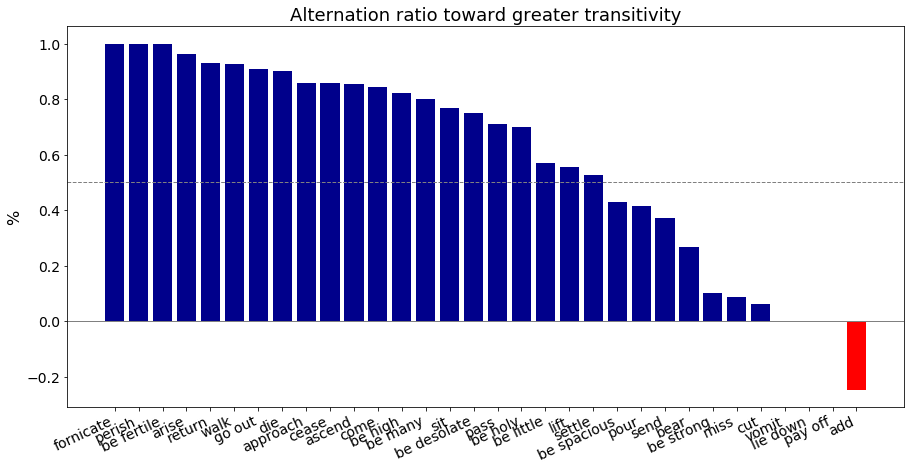

In [36]:
def plotTrans(df, title, column='total', threshold=float, gloss=True, heb=False):
    
    plt.bar(df.index, df[column], color=(df[column] > 0).map({True: 'darkblue', False: 'r'}))
    
    if gloss:
        xaxis = [v[v.index('_')+1:] for v in list(df.index)]
        plt.xticks(df.index, xaxis, rotation=25, size=14, ha='right')
    elif heb:
        xaxis = reverse_hb([v[:v.index('_')] for v in list(df.index)])
        plt.xticks(df.index, xaxis, size=18, fontname = "Times New Roman")
    else:
        xaxis = [v[:v.index('_')] for v in list(df.index)]
        plt.xticks(df.index, xaxis, rotation=25, size=14)        
        
    plt.title(title, size=18)

    plt.yticks(size=14)
    plt.ylabel('%', size=16)
    plt.axhline(0, color='grey', linewidth=1)
    
    if threshold:
        plt.axhline(threshold, color='grey', linewidth=1, linestyle='--')

    plt.show()
    
plotTrans(qal_hif_trans, title='Alternation ratio toward greater transitivity', threshold=.5, gloss=True)

The majority of the lexemes show a clear tendency toward greater transitivity when alternating from *Qal* to *Hiphil*. A few show a miner tendency toward greater transitivty, while יסף "add" show a negative tendency.

We hypothesize that lexemes with a high ratio are more likely to be causatives than lexemes with a low or negative ratio. We chosse 0.5 as threshold. Lexemes with a ratio higher than 0.5 will increase in transitivity in more than 50% of the cases and may therefore reasonable be morphological causatives. On the other hand, lexemes with a ratio lower than 0.5 are more likely not to increase in transitivity. These lexemes may in fact be causatives, but in that case most likely lexical causatives.

In [37]:
hif_causatives = list(qal_hif_trans[qal_hif_trans.total > 0.5].index)
hif_not_causatives = list(qal_hif_trans[~qal_hif_trans.index.isin(causatives)].index)

NameError: name 'causatives' is not defined

#### Causatives

We evaluate each of the lexemes with respect to their occurences in Lev 17-26. If the actual use in that corpus does not support the annotation decided above, it is changed manually by adding the correction to the following dictionary. We also check the lexemes in *Hophal*, which is the presumed passive of *Hiphil*.

In [38]:
correction = {}

In [ ]:
query = '''
book book=Leviticus
 chapter chapter=17|18|19|20|21|22|23|24|25|26
  clause
   phrase function=Pred|PreO|PreS|PreC|PtcO
    word lex={} vs=qal|hif|hof
'''

def display(lex):
    lex = lex[:lex.index('_')]
    results = A.search(query.format(lex))
    A.show(results)

##### ZNH "fornicate"

In [40]:
display(hif_causatives[0])

  1.19s 7 results


The annotation of ZNH "fornicate" can be retained.

##### >BD "perish"

In [93]:
display(hif_causatives[1])

  1.38s 2 results


The annotation can be retained. Curiously, one would expect >BD to be a stative verb, while *Hiphil* is typically used of active verbs in contrast to *Piel* that is frequent with stative verbs.

##### PRH "be fertile"

In [94]:
display(hif_causatives[2])

  1.23s 1 result


For comparison between the *Qal* sense and the *Hiphil* sense we need to include cases from the larger corpus:

In [95]:
query_corpus = '''
corpus
 clause
   phrase function=Pred|PreO|PreS
     word lex={} vs={}
'''

def displayCorpus(lex, stem='qal|hif', s=1, n=5):
    results = A.search(query_corpus.format(lex, stem), sets=sets)
    A.show(results, start=s, end=n)

In [96]:
displayCorpus('PRH[', s=5, n=10)

  1.23s 15 results


The annotation can be retained.

##### Q>M "arise"

In [97]:
display(hif_causatives[3])

  1.25s 4 results


The annotation can be retained

##### CWB "return"

In [98]:
display(hif_causatives[4])

  1.34s 13 results


The annotation can be retained

##### HLK "walk"

In [99]:
display(hif_causatives[5])

  1.45s 13 results


The annotation can be retained.

##### JY> "go out"

In [100]:
display(hif_causatives[6])

  1.39s 20 results


The annotation can be retained.

##### MWT "die"

In [101]:
display(hif_causatives[7])

  1.41s 17 results


AttributeError: 'NoneType' object has no attribute 'index'

The annotation can be retained.

##### QRB "approach"

In [ ]:
display(hif_causatives[8])

The annotation can be retained

##### CBT "cease"

In [ ]:
display(hif_causatives[9])

The annotation can be retained although the relationship between the *Qal* and the *Hiphil* is not entirely clear. The *Qal* verb is sometimes transitive, meaning "keep the sabbath", and sometimes intransitive, "to rest". The one *Hiphil* example is best translated "keep away" which is causative. In short, the *Hiphil* is causative, while the *Qal* is not. 

##### <LH "ascend"

In [ ]:
display(hif_causatives[10])

While the semantic relationship between the *Qal* and the *Hiphil* uses are not totally corresponding, one can regard the *Qal* meaning as "to ascend" while the *Hiphil* is used as "cause to ascend" or "lid/set on fire". The annotation can be retained.

##### BW> "come"

In [ ]:
display(hif_causatives[11])

The annotation can be retained.

##### RWM "be high"

In [ ]:
display(hif_causatives[12])

In [41]:
displayCorpus('RWM[')

NameError: name 'displayCorpus' is not defined

The annotation can be retained. Although the Leviticus-case has a technical meaning of sacrificing, it can still be parsed as causative.

##### RBH "be many"

In [ ]:
display(hif_causatives[13])

In [ ]:
displayCorpus('RBH[')

The annnotation can be retained.

##### JCB "sit"

In [ ]:
display(hif_causatives[14])

The annotation can be retained.

##### CMM "desolate"

In [ ]:
display(hif_causatives[15])

Although the *Qal* meaning is somewhat different than the *Hiphil* in this portion, it is not causative, while *Hiphil* is. We can therefore retain the annotation.

##### <BR "pass"

In [ ]:
display(hif_causatives[16])

The *Hiphil* verbs are difficult to parse because they are used in quite different ways. All of them, however, seem to be causative. In Lev 18:21 the verb is certainly causative, if the referent is the subject from the preceding clause. In short, we can retain the annotation.

##### QDC "be holy"

In [ ]:
display(hif_causatives[17])

In [ ]:
displayCorpus('QDC[', s=5, n=10)

The annotation can be retained. In many cases the object of QDC *Hiphil* can be inferred from a relative particle or from the context. Nevertheless, the *Hiphil* seems to be used for an activity causing something to be holy.

##### M<V "be little"

In [ ]:
display(hif_causatives[18])

In [ ]:
displayCorpus('M<V[')

The annotation can be retained.

##### NF> "lift"

In [ ]:
display(hif_causatives[19])

While the *Qal* comes close to a causative meaning when it is translated "lift" or "carry", the *Hiphil* is certainly causative, because it is translated "cause someone to carry his guilt". We can retain the annotation.

##### NWX "settle"

In [ ]:
display(hif_causatives[20])

In sum, we have retained all causatives in this section.

#### Not causatives

We now more on to the lexemes that have a weaker tendency toward greater transitivy, that is, less than 50% chance. We assume that the lexemes in this category are neither causative in the *Qal* or the *Hiphil*. If the data proves otherwise, we will make manual corrections.

##### RWX "be spacious"

In [ ]:
display(hif_not_causatives[0])

In [ ]:
displayCorpus('RWX[', s=5, n=10)

Neither the *Qal* nor the *Hiphil* seem to be causative. The *Hiphil* is always used as "scent" which is a simple activity with an object. So we can retain the annotation, because we did not expect the lexeme in *Hiphil* to be causative.

##### JYQ "pour"

In [ ]:
display(hif_not_causatives[1])

In [102]:
displayCorpus('JYQ[', stem='hif')

  1.27s 2 results


Annointment is normally presented with *Qal*, so the *Hophal* form in Leviticus is curious. Normally, *Niphal* is used as the passive voice of *Qal* but in this case it is apparently *Hophal*. Nevertheless, both stems seem to carry a causative sense because an object, usually a liquid, is caused to flow or be placed. We therefore change the annotation:

In [39]:
correction['JYQ['] = (('qal','caus'),('hif','caus'))

##### CLX "send"

In [104]:
display(hif_not_causatives[2])

  1.43s 1 result


In [105]:
displayCorpus('CLX[', stem='hif')

  1.25s 2 results


The verb CLX "send/stretch" has many meanings. The *Hiphil* is in fact disputed in Lev 26:22, so the similarity to *Qal* should not be underestimated. Both *Qal* and *Hiphil* seem to be causative:

In [40]:
correction['CLX['] = (('qal','caus'),('hif','caus'))

##### JLD "bear"

In [285]:
display(hif_not_causatives[3])

  1.27s 2 results


In [108]:
displayCorpus('JLD[', stem='hif')

  1.13s 66 results


The *Hiphil* is often used of males while the *Qal* is often used of females. Therefore, the *Hiphil* is probably not causative.

##### XZQ "be strong"

In [109]:
display(hif_not_causatives[4])

  1.11s 1 result


In [110]:
displayCorpus('XZQ[', stem='hif', s=11, n=15)

  1.24s 24 results


The *Hiphil* can sometimes be used as a caustive in the sense of "strengthen" (e.g. 2 Sam 11:25), but most frequently it is used with the preposition B and means "seize/grasp" which is probably not a causative but an achievement. We can therefore retain the annotation because that would be the meaning in Leviticus which is our primary text.

##### PQD "miss"

In [111]:
display(hif_not_causatives[5])

  1.01s 2 results


The two cases are strikingly similar. In both the *Qal* and the *Hiphil* case, there is a direct object and a complement with על "against" indicating the target. Both cases seem to be causative, and we therefore need to manually correct the annotation:

In [41]:
correction['PQD['] = (('qal','caus'),('hif','caus'))

##### KRT "cut"

In [113]:
display(hif_not_causatives[6])

  1.07s 6 results


In [114]:
displayCorpus('KRT[')

  1.32s 99 results


The *Qal* is often used to describe the initation of a covenant, but may also be used in cases of extermination and removal, just like the *Hiphil*. Therefore, *Hiphil* should not be regarded as a morphological causative of *Qal*. The *Hiphil* is certainly causative, and the *Qal* may in many cases also be causative.

In [42]:
correction['KRT['] = (('qal','?'),('hif','caus'))

##### QJ> "vomit"

In [116]:
display(hif_not_causatives[7])

  1.20s 4 results


The *Qal* and *Hiphip* senses seem to be identical. We don't have much evidence to check whether the verb is causative or not. One could argue that "vomit" or "spit out" is a transfer, causing the object to be removed or to leave. On the other hand, there is no indication of either source or target, so we should probably settle with a simple activity, that is, not causative, neither in *Qal* or *Hiphil*. We therefore retain the annotation.

##### RB<= "lie down"

In [117]:
display(hif_not_causatives[8])

  1.30s 3 results


The senses of *Qal* and *Hiphil* support the notion of *Hiphil* as a morphological causative of the *Qal*. In Lev 18 and 20 it means to "lie with" (*Qal*) while in Lev 19 it is used in the sense of causing an to lie with. We therefore need to change the annotation manually:

In [43]:
correction['RB<=['] = (('qal',''),('hif','caus'))

##### RYH "pay off"

In [119]:
display(hif_not_causatives[9])

  1.23s 5 results


The translation of RYH is not easy. It can be translated "enjoy" or "pay off". The presence of "their sin" as the object in 26:43 supports the translation "pay off" rather than "enjoy", but the frequent object "sabbath" is something one would not normally enjoy and not pay off. More importantly in this context is the *Hiphil* case in Lev 26:34 where it seems to be used exactly as *Qal*. The *Hiphil* does not differ from the *Qal*.

In short, we accept a non-causative meaning of the verb, although there might be exceptions elsewhere.

##### JSP "add"

In [121]:
display(hif_not_causatives[10])

  1.19s 4 results


All cases seem to be causative, albeit in different ways.

In [44]:
correction['JSP['] = (('qal','caus'),('hif','caus'))

So far, we have made 6 corrections:

In [45]:
correction

{'JYQ[': (('qal', 'caus'), ('hif', 'caus')),
 'CLX[': (('qal', 'caus'), ('hif', 'caus')),
 'PQD[': (('qal', 'caus'), ('hif', 'caus')),
 'KRT[': (('qal', '?'), ('hif', 'caus')),
 'RB<=[': (('qal', ''), ('hif', 'caus')),
 'JSP[': (('qal', 'caus'), ('hif', 'caus'))}

### *Piel*

We now move on to *Piel* which may also sometimes be used as a causative or a factitive. We will explore, whether the same tendency for greater transitivity to indicate causativity holds for *Piel*.

In [46]:
piel = list(piel)
#piel

In [47]:
frames = {'(S)':avalent_monovalent, '(S)-C':divalent1, '(S)-O_sfx':divalent2, '(S)-O':divalent3, '(S)-O-C':trivalent1,
          '(S)-O_sfx-C':trivalent2, '(S)-O-O':trivalent3, '(S)-O-O_sfx':trivalent4, '(S)-O-O-C':tetravalent1,
         '(S)-O-O_sfx-C':tetravalent2}

stems = 'qal|piel'

lexemes = '|'.join(piel)

verb_constructions = {}

n=0
for fr in frames:
    
    clause = ''
    lex = ''
    stem = ''
    
    results = A.search(frames[fr].format(lexemes, stems), sets=sets, silent=True)
    
    for r in results:
        
        clause = r[1]
        lex = F.lex.v(r[3])
        gloss = F.gloss.v(L.u(r[3], 'lex')[0])
        verb = f'{lex}_{gloss}'
        stem = F.vs.v(r[3])
        
        verb_constructions[clause] = [verb, stem, fr]
            
    n+=1
    print(f'... frame {n} completed')

... frame 1 completed
... frame 2 completed
... frame 3 completed
... frame 4 completed
... frame 5 completed
... frame 6 completed
... frame 7 completed
... frame 8 completed
... frame 9 completed
... frame 10 completed


#### Creating dataframe

In [48]:
piel_df = pd.DataFrame(verb_constructions).T
piel_df.columns = ['lex','stem','frame']
piel_df.head()

lex  stem frame
428816    QLL[_be slight   qal   (S)
428822    QLL[_be slight   qal   (S)
428933  KLH[_be complete  piel   (S)
428968        DBR[_speak  piel   (S)
429081        DBR[_speak  piel   (S)

#### Evaluating data extraction

In [49]:
all_cases = '''
corpus
 clause
  phrase function=Pred|PreO|PreS
   word lex={} sp=verb vs=qal|piel
'''

results_all_cases = A.search(all_cases.format(lexemes), sets=sets)

  1.70s 1674 results


In [50]:
all_clauses = [r[1] for r in results_all_cases]

error_list = []

for cl in all_clauses:
    if cl not in piel_df.index:
        error_list.append(cl)
        
print(f'Number of missing cases: {len(error_list)}')

Number of missing cases: 0


#### Simplifying the dataset

We combine some of the frames in order not to distinguish between lexical and suffix object. That will probably give a clearer picture of the general tendency. First we cross-tabulate lex, stem and frame:

In [51]:
df_frequency = pd.crosstab(index=[piel_df.lex, piel_df.stem], columns=piel_df.frame)

#Column total:
df_frequency['total'] = df_frequency.sum(axis=1)
df_frequency.head()

frame                              (S)  (S)-C  (S)-O  (S)-O-C  (S)-O-O  \
lex                          stem                                        
CKL[_be bereaved of children piel    1      0      4        0        0   
                             qal     3      0      1        0        0   
CLM[_be complete             piel    6      6     11        3        0   
                             qal     1      0      0        0        0   
CLX[_send                    piel    2      9     48       36        0   

frame                              (S)-O-O-C  (S)-O-O_sfx  (S)-O-O_sfx-C  \
lex                          stem                                          
CKL[_be bereaved of children piel          0            0              0   
                             qal           0            0              0   
CLM[_be complete             piel          0            1              0   
                             qal           0            0              0   
CLX[_send                    piel          0            1              0   

frame                              (S)-O_sfx  (S)-O_sfx-C  total  
lex                          stem                                 
CKL[_be bereaved of children piel          0            0      5  
                             qal           0            0      4  
CLM[_be complete             piel          3            0     30  
                             qal           0            0      1  
CLX[_send                    piel         44           18    158

We now reduce the number of frames by combining them:

In [52]:
update_columns = [('(S)','(S)-C'),
                  ('(S)-O','(S)-O_sfx','(S)-O-C','(S)-O_sfx-C'),
                  ('(S)-O-O','(S)-O-O_sfx','(S)-O-O-C','(S)-O-O_sfx-C')
                 ]

for c in update_columns:
    retain_col = c[0]
    copy_col = c[1:]
    
    for d in copy_col:
        new_col = df_frequency[retain_col] + df_frequency[d]
       
        #Dropping columns:
        df_frequency = df_frequency.drop([retain_col,d], axis=1)
    
        #Add new column:
        df_frequency[retain_col] = new_col

In [53]:
df_frequency = df_frequency[['(S)','(S)-O','(S)-O-O','total']]

In [54]:
df_frequency.head()

frame                              (S)  (S)-O  (S)-O-O  total
lex                          stem                            
CKL[_be bereaved of children piel    1      4        0      5
                             qal     3      1        0      4
CLM[_be complete             piel   12     17        1     30
                             qal     1      0        0      1
CLX[_send                    piel   11    146        1    158

#### Plotting tendencies

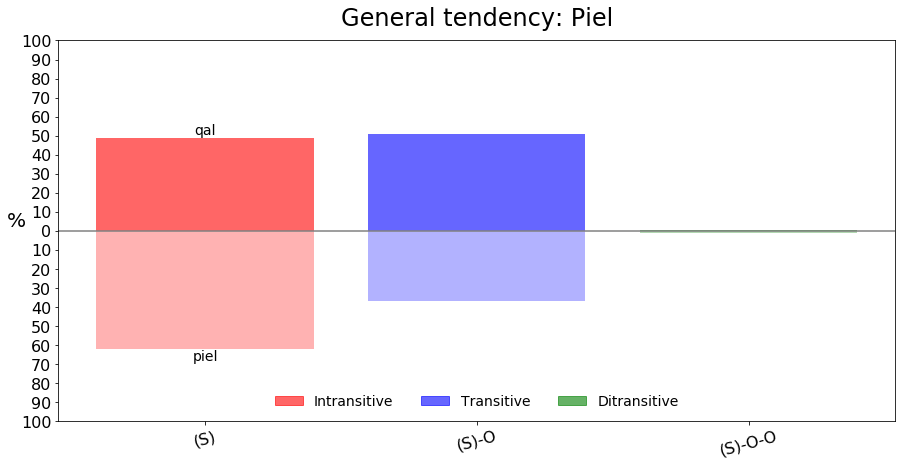

In [55]:
colormap = ['red','blue','green']
col_order = ['(S)','(S)-O','(S)-O-O']

genTendency(df_frequency, 'qal','piel',"General tendency: Piel", col_order, colormap, ylim=100)

In short, we do not see a general tendency toward higher transitivity for the *Piel* stem. Quite the opposite, the *Qal* is apparently more associated with transitivity than the *Piel*. However, the individual lexemes may display important variations.

#### Plotting increasing transitivity

We want to compute a degree of transitivity increase, so that both intransitive and transitive verbs can be equally accounted for. We use the following function to create a dataframe where the ratio of each alternation between *Qal* and *Piel* is computed.

In [56]:
def alternations(df, stems=('qal','hif')):
    
    #Creating a proportional table of the dataframe (column-wise)
    prop_table = df.div(df.total, axis=0)
    
    prop_table = prop_table.drop('total', axis=1) #The total-column is dropped
    prop_table.columns = [col + '_' for col in prop_table.columns] #Adding '_' to the name of each column
    prop_table = prop_table.unstack(level=[1]) #Unstacking table
    
    #The columns are combined with the stem:
    prop_table.columns = pd.Series(prop_table.columns.tolist()).apply(pd.Series).sum(axis=1)
    prop_table = round(prop_table, 6)
    
    ### Each 'qal' column is multiplied by each of the non-qal columns:
    comb_df = pd.DataFrame() #Data is added to empty dataframe
    
    stem1_columns = [col for col in prop_table.columns if col[-len(stems[0]):] == stems[0]]
    stem2_columns = [col for col in prop_table.columns if col[-len(stems[1]):] == stems[1]]
    
    for col1 in stem1_columns:
        for col2 in stem2_columns:
            new_col_name = f'{col1}_TO_{col2}'
            comb_df[new_col_name] = prop_table[col1] * prop_table[col2]
    
    return comb_df
    
qal_piel = alternations(df_frequency, stems=('qal','piel'))

In [57]:
qal_piel.head()

(S)_qal_TO_(S)_piel  (S)_qal_TO_(S)-O_piel  \
lex                                                                        
CKL[_be bereaved of children             0.150000               0.600000   
CLM[_be complete                         0.400000               0.566667   
CLX[_send                                0.025974               0.344753   
CQR[_do falsely                          1.000000               0.000000   
DBR[_speak                                    NaN                    NaN   

                              (S)_qal_TO_(S)-O-O_piel  (S)-O_qal_TO_(S)_piel  \
lex                                                                            
CKL[_be bereaved of children                 0.000000               0.050000   
CLM[_be complete                             0.033333               0.000000   
CLX[_send                                    0.002361               0.043646   
CQR[_do falsely                              0.000000               0.000000   
DBR[_speak                                        NaN                    NaN   

                              (S)-O_qal_TO_(S)-O_piel  \
lex                                                     
CKL[_be bereaved of children                 0.200000   
CLM[_be complete                             0.000000   
CLX[_send                                    0.579298   
CQR[_do falsely                              0.000000   
DBR[_speak                                        NaN   

                              (S)-O_qal_TO_(S)-O-O_piel  \
lex                                                       
CKL[_be bereaved of children                   0.000000   
CLM[_be complete                               0.000000   
CLX[_send                                      0.003968   
CQR[_do falsely                                0.000000   
DBR[_speak                                          NaN   

                              (S)-O-O_qal_TO_(S)_piel  \
lex                                                     
CKL[_be bereaved of children                      0.0   
CLM[_be complete                                  0.0   
CLX[_send                                         0.0   
CQR[_do falsely                                   0.0   
DBR[_speak                                        NaN   

                              (S)-O-O_qal_TO_(S)-O_piel  \
lex                                                       
CKL[_be bereaved of children                        0.0   
CLM[_be complete                                    0.0   
CLX[_send                                           0.0   
CQR[_do falsely                                     0.0   
DBR[_speak                                          NaN   

                              (S)-O-O_qal_TO_(S)-O-O_piel  
lex                                                        
CKL[_be bereaved of children                          0.0  
CLM[_be complete                                      0.0  
CLX[_send                                             0.0  
CQR[_do falsely                                       0.0  
DBR[_speak                                            NaN

We can group the columns according to whether the columns contain alternations toward increasing transitivity. The columns are:

In [58]:
def greaterTransitivity(stem):
    intrans = ['(S)']
    trans = ['(S)-O']
    ditrans = ['(S)-O-O']

    alternation_list = []

    #from intrans
    for k in intrans:
        for l in trans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

        for l in ditrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

    #from trans
    for k in trans:
        for l in ditrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')    

    return alternation_list

def lesserTransitivity(stem):
    intrans = ['(S)']
    trans = ['(S)-O']
    ditrans = ['(S)-O-O']

    alternation_list = []

    #from ditrans
    for k in ditrans:
        for l in trans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

        for l in intrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')

    #from trans
    for k in trans:
        for l in intrans:
            alternation_list.append(f'{k}_qal_TO_{l}_{stem}')    

    return alternation_list

In [59]:
greater_trans = greaterTransitivity('piel')
greater_trans

['(S)_qal_TO_(S)-O_piel',
 '(S)_qal_TO_(S)-O-O_piel',
 '(S)-O_qal_TO_(S)-O-O_piel']

In [60]:
lesser_trans = lesserTransitivity('piel')
lesser_trans

['(S)-O-O_qal_TO_(S)-O_piel',
 '(S)-O-O_qal_TO_(S)_piel',
 '(S)-O_qal_TO_(S)_piel']

We can sum up the means for each of these three columns. There is 65% change for an average lexeme in the dataset to increase in transitivity when alterning from *Qal* to *Hiphil*:

In [61]:
qal_piel[greater_trans].mean().sum()

0.4641595757442143

There is about 2% chance that an average lexeme will decrease in transitivity:

In [62]:
qal_piel[lesser_trans].mean().sum()

0.11980246318035714

And, finally, about there is 32% chance that there is neither decrease or increase when alternating between *Hiphil* and *Qal*:

In [63]:
no_alter = qal_piel[['(S)_qal_TO_(S)_piel','(S)-O_qal_TO_(S)-O_piel','(S)-O-O_qal_TO_(S)-O-O_piel']].mean().sum()
no_alter

0.4160379610754285

In total, all three alternation types should account for 100% of the proportions:

In [64]:
qal_piel[greater_trans].mean().sum() + qal_piel[lesser_trans].mean().sum() + no_alter

1.0

We now turn our attention toward individual words and their alternation schemes. If we compute the total ratio of transitivity increase as the proportion of increase minus the proportion of decrease (while disregarding the no-alternation pattern), we get the table below:

In [65]:
qal_piel_trans = qal_piel[greater_trans + lesser_trans]

#We create two new columns, one for the sum of greater transitivity and one for the sum of lesser:
qal_piel_trans.insert(6, 'increase', list(qal_piel_trans[greater_trans].sum(axis=1)))
qal_piel_trans.insert(7, 'decrease', list(qal_piel_trans[lesser_trans].sum(axis=1)))

#The two new columns are summed by treating the decrease column as negative:
qal_piel_trans.insert(8, 'total', qal_piel_trans['increase']-qal_piel_trans['decrease'])
qal_piel_trans = qal_piel_trans.sort_values(by='total', ascending=False)
qal_piel_trans

(S)_qal_TO_(S)-O_piel  (S)_qal_TO_(S)-O-O_piel  \
lex                                                                            
QDC[_be holy                               0.975000                 0.025000   
VM>[_be unclean                            0.965517                 0.000000   
CLM[_be complete                           0.566667                 0.033333   
QLL[_be slight                             0.583333                 0.041667   
CKL[_be bereaved of children               0.600000                 0.000000   
LQV[_gather                                0.545455                 0.000000   
ZRH[_scatter                               0.500000                 0.000000   
GLH[_uncover                               0.454545                 0.000000   
KLH[_be complete                           0.372372                 0.000000   
CLX[_send                                  0.344753                 0.002361   
ML>[_be full                               0.135849                 0.060377   
CQR[_do falsely                            0.000000                 0.000000   
DBR[_speak                                      NaN                      NaN   
XCB[_account                               0.121212                 0.000000   
KPR[_cover                                 0.000000                 0.000000   

                              (S)-O_qal_TO_(S)-O-O_piel  \
lex                                                       
QDC[_be holy                                   0.000000   
VM>[_be unclean                                0.000000   
CLM[_be complete                               0.000000   
QLL[_be slight                                 0.008333   
CKL[_be bereaved of children                   0.000000   
LQV[_gather                                    0.000000   
ZRH[_scatter                                   0.000000   
GLH[_uncover                                   0.000000   
KLH[_be complete                               0.000000   
CLX[_send                                      0.003968   
ML>[_be full                                   0.158491   
CQR[_do falsely                                0.000000   
DBR[_speak                                          NaN   
XCB[_account                                   0.000000   
KPR[_cover                                     0.000000   

                              (S)-O-O_qal_TO_(S)-O_piel  \
lex                                                       
QDC[_be holy                                   0.000000   
VM>[_be unclean                                0.000000   
CLM[_be complete                               0.000000   
QLL[_be slight                                 0.000000   
CKL[_be bereaved of children                   0.000000   
LQV[_gather                                    0.000000   
ZRH[_scatter                                   0.000000   
GLH[_uncover                                   0.000000   
KLH[_be complete                               0.000000   
CLX[_send                                      0.000000   
ML>[_be full                                   0.016981   
CQR[_do falsely                                0.000000   
DBR[_speak                                          NaN   
XCB[_account                                   0.060606   
KPR[_cover                                     0.000000   

                              (S)-O-O_qal_TO_(S)_piel  (S)-O_qal_TO_(S)_piel  \
lex                                                                            
QDC[_be holy                                 0.000000               0.000000   
VM>[_be unclean                              0.000000               0.000000   
CLM[_be complete                             0.000000               0.000000   
QLL[_be slight                               0.000000               0.041667   
CKL[_be bereaved of children                 0.000000               0.050000   
LQV[_gather                                  0.000000               0.000000   
ZRH[_scatter         

We can now plot the average alternation pattern for each of the lexeme in question:

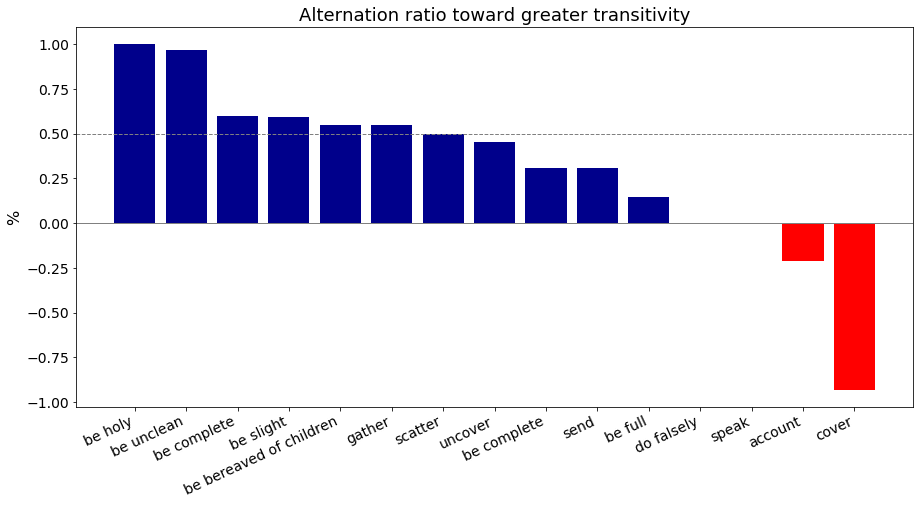

In [66]:
plotTrans(qal_piel_trans, title='Alternation ratio toward greater transitivity', threshold=.5, gloss=True)

The image is much less clear than for the *Hiphil* stem. More than half of the verbs in question do not have a tendency toward increase of transitivity when alternating from *Qal* to *Piel*. As for the *Hiphil*, we hypothesize that lexemes with a ratio higher han 0.5 can be regarded as morphological causatives of the *Qal* correspondent, while the remaining lexemes do not share this semantic relationship. 

In [67]:
piel_causatives = list(qal_piel_trans[qal_piel_trans.total > 0.5].index)
piel_not_causatives = list(qal_piel_trans[~qal_piel_trans.index.isin(causatives)].index)

NameError: name 'causatives' is not defined

#### Causative *Piel*

In [68]:
correction1 = {}

In [74]:
query = '''
book book=Leviticus
 chapter chapter=17|18|19|20|21|22|23|24|25|26
  clause
   phrase function=Pred|PreO|PreS|PreC|PtcO
    word lex={} vs=qal|piel|pual
'''

def display(lex):
    lex = lex[:lex.index('_')]
    results = A.search(query.format(lex))
    A.show(results)

##### QDC "be holy"

In [75]:
display(piel_causatives[0])

  1.37s 9 results


The lexeme is important for this analysis because it appears in both *Qal*, *Hiphil*, and *Piel*. In most cases, the word is used in *Piel* as sanctifying, a causative event but not in the sense of a cultic activity like the *Hiphil*. In a single case in this section of Leviticus, the *Piel* is used in the declarative sense, that is, to consider something holy (Lev 21:8). For now, we retain the annotation, because that single case is an exception in this part of Leviticus.

##### VM> "be unclean"

In [193]:
display(piel_causatives[1])

  1.05s 13 results


Generally, the *Qal* is used to express "being unclean", while the *Piel* is used to express "causing something to be unclean". There is one exception, though: In Lev 20:25 the *Piel* is used in a declarative sense "to regard (something) as unclean". For now, we consider *Piel* as causative and retain the annotations.

##### CLM "be complete"

In [203]:
display(piel_causatives[2])

  1.15s 2 results


In [206]:
displayCorpus('CLM[', stem='qal|piel')

  1.06s 31 results


Both the *Qal* and *Piel* forms of this lexeme have many meanings. However, it is reasonable to think of the *Piel* as causative and the *Qal* as not causative. We can therefore retain the annotation.

##### QLL "be slight"

In [195]:
display(piel_causatives[3])

  1.02s 5 results


In [199]:
displayCorpus('QLL[', stem='qal|piel', s=6, n=10)

  1.07s 26 results


The *Piel* of QLL is a speech verb and means "to curse". It is therefore not causative and we need to change the annotation. The *Qal* can mean different things but is used for "being cursed", a stative, not causative verb:

In [69]:
correction1['QLL['] = (('qal',''),('piel',''))

##### CKL "be bereaved"

In [210]:
display(piel_causatives[4])

  0.99s 1 result


In [212]:
displayCorpus('CKL[', stem='qal|piel')

  0.98s 9 results


The annotation can be retained.

##### LQV "gather"

In [293]:
display(piel_causatives[5])

NameError: name 'piel_causatives' is not defined

In [215]:
displayCorpus('LQV[', stem='qal|piel')

  1.02s 18 results


*Qal* and *Piel* seem to be equally used for "gathering", so we can hardly retain the *Piel* as a morphological causative. By contrast, both the *Qal* and *Piel* should be considered causative.

In [70]:
correction1['LQV['] = (('qal','caus'),('piel','caus'))

#### Not causative *Piel*

Finally, we turn our attention toward *Piel* formations that are not hypothesized as morphological causatives of the *Qal*.

##### ZRH "scatter"

In [220]:
display(piel_not_causatives[0])

  1.16s 1 result


In [221]:
displayCorpus('ZRH[', stem='qal|piel')

  1.17s 4 results


The *Piel* does not seem to be a causative of the *Qal*. By constrast, both stems are used to express some kind of scattering, therefore both causative.

In [71]:
correction1['ZRH['] = (('qal','caus'),('piel','caus'))

##### GLH "uncover"

In [223]:
display(piel_not_causatives[1])

  1.23s 24 results


In [225]:
displayCorpus('GLH[', 'qal', s=6, n=10)

  1.29s 11 results


The verb is difficult and is used in a variety of meanings, most dominantly for "go into exile" and "uncover/open" (both *Qal*). The *Piel* is used for "uncover" or "expose" in a negative sense. In short, there is no derivable relationship in terms for causation between the two stems and they can both be used for causation.

In [72]:
correction1['GLH['] = (('qal','?'),('piel','caus'))

##### KLH "be complete"

In [228]:
display(piel_not_causatives[2])

  1.19s 4 results


In [231]:
displayCorpus('KLH[', stem='qal', s=6, n=10)

  1.27s 9 results


In most cases, the *Qal* is used to express "be completed" or "be full of", a stative not causative meaning. It makes sense to see the *Piel* as the causing something to be completed. In some cases, the *Piel* can also express extermination, which is also causative. We therefore need to change the annotation:

In [73]:
correction1['KLH['] = (('qal',''),('piel','caus'))

##### CLX "send"

In [233]:
display(piel_not_causatives[3])

  1.16s 3 results


In [236]:
displayCorpus('CLX[', stem='qal')

  1.33s 327 results


Both *Qal* and *Piel* seem to denote some kind of transfer, therefore both causative:

In [74]:
correction1['CLX['] = (('qal','caus'),('piel','caus'))

##### ML> "be full"

In [242]:
display(piel_not_causatives[4])

  1.34s 3 results


In [247]:
displayCorpus('ML>[', stem='nif')

  1.24s 9 results


Both *Qal* and *Piel* seem to be causative in most cases. The *Niphal* seems to express the meaning "be full" but *Qal* can also be used in this sense. If we focus on Lev 17-26, the *Piel* is clearly causative, while *Qal* is used in a non-causative sense. This annotation would not account for all cases in the larger corpus, however:

In [75]:
correction1['ML>['] = (('qal',''),('piel','caus'))

##### CQR "do falsely"

In [251]:
display(piel_not_causatives[5])

  1.24s 1 result


In [257]:
displayCorpus('CQR[', stem='qal|piel')

  1.27s 3 results


Both *Piel* and *Qal* seem to be used of "lying" or "deal falsely", an activity but not causative. We therefore retain the annotation.

##### DBR "speak"

In [258]:
display(piel_not_causatives[6])

  1.21s 31 results


"To speak" is certainly not a causative and we can retain the annotation.

##### XCB "account"

In [259]:
display(piel_not_causatives[7])

  1.13s 3 results


In [260]:
displayCorpus('XCB[', stem='qal')

  1.18s 11 results


The *Qal* and the *Piel* senses are different but not in terms of causativity, so we can retain the annotation.

##### KPR "cover"

In [261]:
display(piel_not_causatives[8])

  1.18s 4 results


In [263]:
displayCorpus('KPR[', stem='qal')

  1.20s 1 result


The *Qal* is used in a very specific way in Gen 6 about applying a kind of paint or coverage. The *Piel* is commonly used for atoning and is therefore not a morphological causative. Leviticus 16 uses the lexeme KPR differently, as the object of the atonement (e.g. the tent) is expressed as a direct object. Normally, it is an oblique object, such as "upon his soul":

In [267]:
KPR = '''
corpus
  clause
    phrase function=Pred|PreO|PreS|PreC
      word lex=KPR[ vs=piel
    phrase function=Objc
'''

KPR = A.search(KPR, sets=sets)
A.show(KPR)

  1.80s 5 results


Perhaps we should not consider KPR *Piel* as a causative, because our primary text, Leviticus, does not use KPR literarlly as "covering" but in a more technical sense that can best be desribed as a doing something on behalf on another.

### Summary

We can now summarize our results:

In [76]:
print(f'Number of verbs reviewed: {len(unique_verbs)}')
print(f'Number of corrections made: {len(correction) + len(correction1)}')

Number of verbs reviewed: 45
Number of corrections made: 13


What remains is to combine all results and store them in a single file. Only morphological causatives are stored in order to enhance consistency. However, apart from the morphological causative itself, the non-causative correspondent and the passive equivalents of both causative and non-causative are annotated, the passive being annotated similar to its non-passive equivalent.

In [77]:
def causation(df, stem, passive, correction, column='total'):
    
    causation_dict = collections.defaultdict()
    
    causatives = list(df[df[column] > 0.5].index)
    
    for lex in list(df.index):
        if getLex(lex) in correction:
            for stem, aspect in correction[getLex(lex)]:
                causation_dict[f'{getLex(lex)}_{stem}'] = aspect
                
        else:
            if lex in causatives:
                causation_dict[f'{getLex(lex)}_qal'] = ''
                causation_dict[f'{getLex(lex)}_nif'] = ''
                causation_dict[f'{getLex(lex)}_{stem}'] = 'caus'
                causation_dict[f'{getLex(lex)}_{passive}'] = 'caus'
    
    return causation_dict

In [78]:
hif_caus = causation(qal_hif_trans, 'hif', 'hof', correction)
piel_caus = causation(qal_piel_trans, 'piel', 'pual', correction1)

We can now combine the two dictionaries:

In [79]:
comb_df = collections.defaultdict()

for lex in hif_caus:
    comb_df[lex] = hif_caus[lex]
    
for lex in piel_caus:
    comb_df[lex] = piel_caus[lex]

In [80]:
comb_df = pd.DataFrame([comb_df]).T
comb_df.head()

0
<BR[_hif  caus
<BR[_hof  caus
<BR[_nif      
<BR[_qal      
<LH[_hif  caus

In [81]:
len(comb_df)

123

### Export

In [82]:
comb_df.to_csv(f'{PATH}Lev17-26_morphological_causitive.csv')